In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

resumes = pd.read_csv('input/data-2.csv' ,encoding='utf-8')
resumes['Cleaned resume'] = ''
del resumes['ID']
del resumes['Resume_html']
resumes['Resume'] = resumes['Resume_str']
del resumes['Resume_str']
resumes.head()

,Category,Cleaned resume,Resume
0,HR,,HR ADMINISTRATOR/MARKETING ASSOCIATE\...
1,HR,,"HR SPECIALIST, US HR OPERATIONS ..."
2,HR,,HR DIRECTOR Summary Over 2...
3,HR,,HR SPECIALIST Summary Dedica...
4,HR,,HR MANAGER Skill Highlights ...


In [183]:
print (resumes['Category'].unique())

['HR' 'DESIGNER' 'INFORMATION-TECHNOLOGY' 'TEACHER' 'ADVOCATE'
 'BUSINESS-DEVELOPMENT' 'HEALTHCARE' 'FITNESS' 'AGRICULTURE' 'BPO' 'SALES'
 'CONSULTANT' 'DIGITAL-MEDIA' 'AUTOMOBILE' 'CHEF' 'FINANCE' 'APPAREL'
 'ENGINEERING' 'ACCOUNTANT' 'CONSTRUCTION' 'PUBLIC-RELATIONS' 'BANKING'
 'ARTS' 'AVIATION']


In [184]:
print (resumes['Category'].value_counts())

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64


In [185]:
import re
def clean_data(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]',r' ', text)
    text = re.sub('exprience', 'experience',text)
    text = " ".join(text.split())  # remove extra whitespace
    return text

In [186]:
resumes['Cleaned resume'] = resumes.Resume.apply(lambda text: clean_data(text))
resumes.head()

,Category,Cleaned resume,Resume
0,HR,hr administrator marketing associate hr admini...,HR ADMINISTRATOR/MARKETING ASSOCIATE\...
1,HR,hr specialist us hr operations summary versati...,"HR SPECIALIST, US HR OPERATIONS ..."
2,HR,hr director summary over 20 years experience i...,HR DIRECTOR Summary Over 2...
3,HR,hr specialist summary dedicated driven and dyn...,HR SPECIALIST Summary Dedica...
4,HR,hr manager skill highlights hr skills hr depar...,HR MANAGER Skill Highlights ...


In [187]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jacopo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [189]:
tokenized_text = []
cleaned_resumes = ""

for resume in resumes['Resume'].values:
    cleaned_resume = clean_data(resume)
    cleaned_resumes += cleaned_resume
    tokenized_text.extend(nltk.word_tokenize(cleaned_resume))

tokenized_text

['hr',
 'administrator',
 'marketing',
 'associate',
 'hr',
 'administrator',
 'summary',
 'dedicated',
 'customer',
 'service',
 'manager',
 'with',
 '15',
 'years',
 'of',
 'experience',
 'in',
 'hospitality',
 'and',
 'customer',
 'service',
 'management',
 'respected',
 'builder',
 'and',
 'leader',
 'of',
 'customer',
 'focused',
 'teams',
 'strives',
 'to',
 'instill',
 'a',
 'shared',
 'enthusiastic',
 'commitment',
 'to',
 'customer',
 'service',
 'highlights',
 'focused',
 'on',
 'customer',
 'satisfaction',
 'team',
 'management',
 'marketing',
 'savvy',
 'conflict',
 'resolution',
 'techniques',
 'training',
 'and',
 'development',
 'skilled',
 'multi',
 'tasker',
 'client',
 'relations',
 'specialist',
 'accomplishments',
 'missouri',
 'dot',
 'supervisor',
 'training',
 'certification',
 'certified',
 'by',
 'ihg',
 'in',
 'customer',
 'loyalty',
 'and',
 'marketing',
 'by',
 'segment',
 'hilton',
 'worldwide',
 'general',
 'manager',
 'training',
 'certification',
 'accom

In [190]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_en = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jacopo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [191]:
tokenized_text_filtered = []
for token in tokenized_text:
    if token not in stopwords_en:
        tokenized_text_filtered.append(token)

tokenized_text_filtered

['hr',
 'administrator',
 'marketing',
 'associate',
 'hr',
 'administrator',
 'summary',
 'dedicated',
 'customer',
 'service',
 'manager',
 '15',
 'years',
 'experience',
 'hospitality',
 'customer',
 'service',
 'management',
 'respected',
 'builder',
 'leader',
 'customer',
 'focused',
 'teams',
 'strives',
 'instill',
 'shared',
 'enthusiastic',
 'commitment',
 'customer',
 'service',
 'highlights',
 'focused',
 'customer',
 'satisfaction',
 'team',
 'management',
 'marketing',
 'savvy',
 'conflict',
 'resolution',
 'techniques',
 'training',
 'development',
 'skilled',
 'multi',
 'tasker',
 'client',
 'relations',
 'specialist',
 'accomplishments',
 'missouri',
 'dot',
 'supervisor',
 'training',
 'certification',
 'certified',
 'ihg',
 'customer',
 'loyalty',
 'marketing',
 'segment',
 'hilton',
 'worldwide',
 'general',
 'manager',
 'training',
 'certification',
 'accomplished',
 'trainer',
 'cross',
 'server',
 'hospitality',
 'systems',
 'hilton',
 'onq',
 'micros',
 'opera',

In [192]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jacopo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [193]:
pos_tagging = nltk.pos_tag(tokenized_text_filtered)
pos_tagging

[('hr', 'NN'),
 ('administrator', 'NN'),
 ('marketing', 'NN'),
 ('associate', 'JJ'),
 ('hr', 'NN'),
 ('administrator', 'NN'),
 ('summary', 'NN'),
 ('dedicated', 'VBN'),
 ('customer', 'NN'),
 ('service', 'NN'),
 ('manager', 'NN'),
 ('15', 'CD'),
 ('years', 'NNS'),
 ('experience', 'NN'),
 ('hospitality', 'NN'),
 ('customer', 'NN'),
 ('service', 'NN'),
 ('management', 'NN'),
 ('respected', 'VBD'),
 ('builder', 'NN'),
 ('leader', 'NN'),
 ('customer', 'NN'),
 ('focused', 'VBD'),
 ('teams', 'NNS'),
 ('strives', 'NNS'),
 ('instill', 'RB'),
 ('shared', 'VBN'),
 ('enthusiastic', 'JJ'),
 ('commitment', 'NN'),
 ('customer', 'NN'),
 ('service', 'NN'),
 ('highlights', 'NNS'),
 ('focused', 'VBD'),
 ('customer', 'NN'),
 ('satisfaction', 'NN'),
 ('team', 'NN'),
 ('management', 'NN'),
 ('marketing', 'NN'),
 ('savvy', 'NN'),
 ('conflict', 'NN'),
 ('resolution', 'NN'),
 ('techniques', 'NNS'),
 ('training', 'VBG'),
 ('development', 'NN'),
 ('skilled', 'VBD'),
 ('multi', 'NNS'),
 ('tasker', 'NN'),
 ('clien

In [194]:
def simpler_pos_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return "a"
    elif nltk_tag.startswith('V'):
        return "v"
    elif nltk_tag.startswith('N'):
        return "n"
    elif nltk_tag.startswith('R'):
        return "r"
    else:
        return None

simpler_POS_text = []

# for each tuple of the list, we create a new tuple: the first element is the token, the second is
# the simplified pos tag, obtained calling the function simpler_pos_tag()
# then we append the new created tuple to a new list, which will be the output
for tuple in pos_tagging:
    POS_tuple = (tuple[0], simpler_pos_tag(tuple[1]))
    simpler_POS_text.append(POS_tuple)

simpler_POS_text

[('hr', 'n'),
 ('administrator', 'n'),
 ('marketing', 'n'),
 ('associate', 'a'),
 ('hr', 'n'),
 ('administrator', 'n'),
 ('summary', 'n'),
 ('dedicated', 'v'),
 ('customer', 'n'),
 ('service', 'n'),
 ('manager', 'n'),
 ('15', None),
 ('years', 'n'),
 ('experience', 'n'),
 ('hospitality', 'n'),
 ('customer', 'n'),
 ('service', 'n'),
 ('management', 'n'),
 ('respected', 'v'),
 ('builder', 'n'),
 ('leader', 'n'),
 ('customer', 'n'),
 ('focused', 'v'),
 ('teams', 'n'),
 ('strives', 'n'),
 ('instill', 'r'),
 ('shared', 'v'),
 ('enthusiastic', 'a'),
 ('commitment', 'n'),
 ('customer', 'n'),
 ('service', 'n'),
 ('highlights', 'n'),
 ('focused', 'v'),
 ('customer', 'n'),
 ('satisfaction', 'n'),
 ('team', 'n'),
 ('management', 'n'),
 ('marketing', 'n'),
 ('savvy', 'n'),
 ('conflict', 'n'),
 ('resolution', 'n'),
 ('techniques', 'n'),
 ('training', 'v'),
 ('development', 'n'),
 ('skilled', 'v'),
 ('multi', 'n'),
 ('tasker', 'n'),
 ('client', 'n'),
 ('relations', 'n'),
 ('specialist', 'v'),
 ('acc

In [195]:
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /Users/jacopo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [196]:
lemmatized_text = []

for tuple in simpler_POS_text:
    if tuple[1] == None:
        lemmatized_text.append(lemmatizer.lemmatize(tuple[0]))
    else:
        lemmatized_text.append(lemmatizer.lemmatize(tuple[0], pos=tuple[1]))

lemmatized_text

['hr',
 'administrator',
 'marketing',
 'associate',
 'hr',
 'administrator',
 'summary',
 'dedicate',
 'customer',
 'service',
 'manager',
 '15',
 'year',
 'experience',
 'hospitality',
 'customer',
 'service',
 'management',
 'respect',
 'builder',
 'leader',
 'customer',
 'focus',
 'team',
 'strives',
 'instill',
 'share',
 'enthusiastic',
 'commitment',
 'customer',
 'service',
 'highlight',
 'focus',
 'customer',
 'satisfaction',
 'team',
 'management',
 'marketing',
 'savvy',
 'conflict',
 'resolution',
 'technique',
 'train',
 'development',
 'skilled',
 'multi',
 'tasker',
 'client',
 'relation',
 'specialist',
 'accomplishment',
 'missouri',
 'dot',
 'supervisor',
 'training',
 'certification',
 'certify',
 'ihg',
 'customer',
 'loyalty',
 'marketing',
 'segment',
 'hilton',
 'worldwide',
 'general',
 'manager',
 'training',
 'certification',
 'accomplish',
 'trainer',
 'cross',
 'server',
 'hospitality',
 'system',
 'hilton',
 'onq',
 'micros',
 'opera',
 'pms',
 'fidelio',
 

In [197]:
word_frequency_distribution = nltk.FreqDist(lemmatized_text)
most_common = word_frequency_distribution.most_common(50)
print(most_common)

[('state', 16802), ('company', 15722), ('city', 15121), ('management', 12180), ('name', 11780), ('customer', 11345), ('service', 9217), ('work', 8736), ('sale', 8553), ('business', 8089), ('project', 7951), ('skill', 7539), ('system', 7256), ('team', 7126), ('client', 6516), ('manage', 6499), ('new', 6418), ('process', 6348), ('experience', 6276), ('include', 6118), ('development', 5810), ('develop', 5731), ('maintain', 5664), ('account', 5617), ('provide', 5558), ('manager', 5557), ('plan', 5511), ('program', 5465), ('report', 5334), ('design', 5118), ('support', 5009), ('product', 4864), ('staff', 4537), ('information', 4504), ('office', 4432), ('employee', 4391), ('use', 4365), ('financial', 4227), ('professional', 4188), ('education', 4101), ('create', 3922), ('ensure', 3840), ('data', 3797), ('train', 3781), ('communication', 3723), ('operation', 3714), ('year', 3689), ('assist', 3573), ('need', 3549), ('university', 3510)]


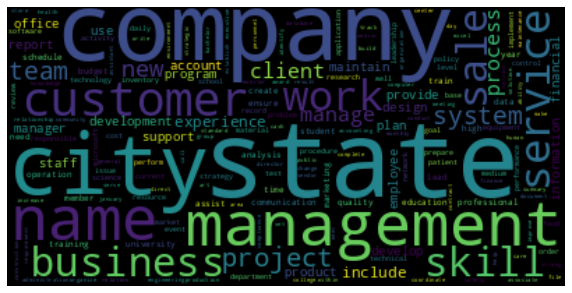

In [198]:
word_cloud = WordCloud(collocations=False, stopwords=stopwords_en).generate(" ".join(lemmatized_text))
plt.figure(figsize=(10,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [200]:
cleaned_resumes_category = {}
tokenized_text_category = {}

categories = resumes['Category'].unique()

for category in categories:
    cleaned_resumes_category[category] = ""
    tokenized_text_category[category] = []

In [123]:
for resume in resumes.values:
    cleaned_resume = clean_data(resume[1])
    tokenized_text = nltk.word_tokenize(cleaned_resume)
    for token in tokenized_text:
        if token not in stopwords_en:
            tokenized_text_category[resume[0]].append(token)

pos_tagging_category = {}

for category in categories:
    pos_tagging_category[category] = nltk.pos_tag(tokenized_text_category[category])


simpler_POS_text_category = {}

# for each tuple of the list, we create a new tuple: the first element is the token, the second is
# the simplified pos tag, obtained calling the function simpler_pos_tag()
# then we append the new created tuple to a new list, which will be the output
for category in categories:
    simpler_POS_text_category[category] = []
    for tuple in pos_tagging_category[category]:
        POS_tuple = (tuple[0], simpler_pos_tag(tuple[1]))
        simpler_POS_text_category[category].append(POS_tuple)

lemmatized_text_category = {}

for category in categories:
    lemmatized_text_category[category] = []
    for tuple in simpler_POS_text_category[category]:
        if tuple[1] == None:
            lemmatized_text_category[category].append(lemmatizer.lemmatize(tuple[0]))
        else:
            lemmatized_text_category[category].append(lemmatizer.lemmatize(tuple[0], pos=tuple[1]))

lemmatized_text_category

{'Data Science': ['skill',
  'program',
  'language',
  'python',
  'pandas',
  'numpy',
  'scipy',
  'scikit',
  'learn',
  'matplotlib',
  'sql',
  'java',
  'javascript',
  'jquery',
  'machine',
  'learn',
  'regression',
  'svm',
  'na',
  'bay',
  'knn',
  'random',
  'forest',
  'decision',
  'tree',
  'boost',
  'technique',
  'cluster',
  'analysis',
  'word',
  'embed',
  'sentiment',
  'analysis',
  'natural',
  'language',
  'processing',
  'dimensionality',
  'reduction',
  'topic',
  'model',
  'lda',
  'nmf',
  'pca',
  'neural',
  'net',
  'database',
  'visualization',
  'mysql',
  'sqlserver',
  'cassandra',
  'hbase',
  'elasticsearch',
  'd3',
  'j',
  'dc',
  'j',
  'plotly',
  'kibana',
  'matplotlib',
  'ggplot',
  'tableau',
  'others',
  'regular',
  'expression',
  'html',
  'cs',
  'angular',
  '6',
  'logstash',
  'kafka',
  'python',
  'flask',
  'git',
  'docker',
  'computer',
  'vision',
  'open',
  'cv',
  'understand',
  'deep',
  'learning',
  'educat

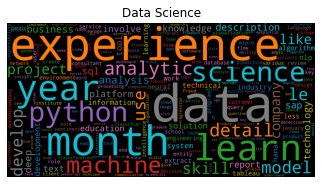

In [31]:
plt.figure(figsize=(32, 28))

for i, category in enumerate(categories):
    word_cloud = WordCloud(collocations=False, stopwords=stopwords_en, height=2000, width=4000, colormap='tab10_r').generate(" ".join(lemmatized_text_category[category]))
    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(word_cloud)
    plt.axis('off')
    break

plt.show()
plt.close()

In [202]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
resumes['Category_label'] = label_encoder.fit_transform(resumes['Category'])
resumes.head()

,Category,Cleaned resume,Resume,Category_label
0,HR,hr administrator marketing associate hr admini...,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,19
1,HR,hr specialist us hr operations summary versati...,"HR SPECIALIST, US HR OPERATIONS ...",19
2,HR,hr director summary over 20 years experience i...,HR DIRECTOR Summary Over 2...,19
3,HR,hr specialist summary dedicated driven and dyn...,HR SPECIALIST Summary Dedica...,19
4,HR,hr manager skill highlights hr skills hr depar...,HR MANAGER Skill Highlights ...,19


In [203]:
category_label = {}
labels = label_encoder.fit_transform(categories)
for i, category in enumerate(categories):
    category_label[labels[i]] = category

category_label

{19: 'HR',
 13: 'DESIGNER',
 20: 'INFORMATION-TECHNOLOGY',
 23: 'TEACHER',
 1: 'ADVOCATE',
 9: 'BUSINESS-DEVELOPMENT',
 18: 'HEALTHCARE',
 17: 'FITNESS',
 2: 'AGRICULTURE',
 8: 'BPO',
 22: 'SALES',
 12: 'CONSULTANT',
 14: 'DIGITAL-MEDIA',
 5: 'AUTOMOBILE',
 10: 'CHEF',
 16: 'FINANCE',
 3: 'APPAREL',
 15: 'ENGINEERING',
 0: 'ACCOUNTANT',
 11: 'CONSTRUCTION',
 21: 'PUBLIC-RELATIONS',
 7: 'BANKING',
 4: 'ARTS',
 6: 'AVIATION'}

In [204]:
def clean(text):
    text = clean_data(text)
    tokens = nltk.word_tokenize(text)
    tokens_filtered = []
    for token in tokens:
        if token not in stopwords_en:
            tokens_filtered.append(token)

    pos_tagging = nltk.pos_tag(tokens_filtered)

    simpler_POS_text = []

    for tuple in pos_tagging:
        POS_tuple = (tuple[0], simpler_pos_tag(tuple[1]))
        simpler_POS_text.append(POS_tuple)

    lemmatized_text = []

    for tuple in simpler_POS_text:
        if tuple[1] == None:
            lemmatized_text.append(lemmatizer.lemmatize(tuple[0]))
        else:
            lemmatized_text.append(lemmatizer.lemmatize(tuple[0], pos=tuple[1]))

    return lemmatized_text

In [207]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

labels = resumes['Category_label']

word_vectorizer = TfidfVectorizer(analyzer=clean)
word_vectorizer.fit(resumes['Resume'])
vectorized_resumes = word_vectorizer.transform(resumes['Resume'])

X_train,X_test,y_train,y_test = train_test_split(vectorized_resumes,labels,random_state=42, test_size=0.2,shuffle=True, stratify=labels)
print(X_train.shape)
print(X_test.shape)

(1987, 35889)
(497, 35889)


In [208]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
clf = OneVsRestClassifier(rf)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 1.00
Accuracy of KNeighbors Classifier on test set:     0.61


In [209]:
check = []
check_wrong = []

for i, test in enumerate(y_test):
    check.append({'prediction': category_label[prediction[i]], 'test': category_label[test]})

for elem in check:
    if elem['prediction'] != elem['test']:
        check_wrong.append(elem)

print(len(check_wrong), len(check))

196 497


In [210]:
from sklearn.model_selection import cross_val_score

X = word_vectorizer.transform(resumes['Resume'])
y = resumes['Category_label']

In [211]:
scores = cross_val_score(rf,X,y,cv=5)
scores.mean()

0.6114939637826963